# Анализ игровой сферы


Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Знакомство с данными

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.patches as patches
import warnings

warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.duplicated().sum()

0

### Вывод:

Хорошие данные, нет дубликатов, нужно избавиться от пропусков, привести столбцы к нижнему змеиному регистру и заменить тип данных в некоторых колонках.

В основном отсутствуют данные по оценкам критиков, игроков и по рейтингу, это вполне логично, такая информация есть не по всем играм

## Подготовка данных

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
df.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year', 'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'global_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'}, inplace = True) 

In [10]:
df.columns # привели к нижнему регистру.

Index(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'global_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   global_sales  16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df['name'].isna().sum()# 2 пропуска в названии игры


2

In [14]:
df.query('name != name')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По этим играм нет информации кроме года, платформы и прибыли, игры старые, и 2 строки не повлияют на ход анализа, можем их дропнуть

In [15]:
df = df.query('name == name') # готово


In [16]:
df['platform'].unique()# здесь все ок


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
df['year'].isna().sum()

269

In [18]:
df.query('year != year')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков в столбце year, скорее всего это техническая ошибка. гуглить каждую из 269 игр и искать год выпуска мы не будем, заполним пропуски нулями, и при дальнейшем анализе будем их фильтровать.

In [19]:
df['year'] = df['year'].fillna(0)
df['year'].isna().sum()# done

0

In [20]:
df['year'] = df['year'].astype('int') # заменим год выпуска на int 
 

In [21]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

C жанрами все ок, пропусков нет

In [22]:
df['na_sales'].describe()

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [23]:
df['eu_sales'].describe()

count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [24]:
df['jp_sales'].describe()

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [25]:
df['global_sales'].describe()

count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: global_sales, dtype: float64

c продажами тоже все ок, идем дальше 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   global_sales  16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [27]:
df['critic_score'].describe() #100 бальная система, много пропусков. 

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Если рейтинга нет, значит критики не оценивали игру, заполним нулями

In [28]:
df['critic_score'] = df['critic_score'].fillna(0)

In [29]:
df['critic_score'].isna().sum()# готово

0

In [30]:
df['user_score'].unique() # Поменяем object на флоат

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение tbd -  To Be Determined, то есть "Будет определено"

In [31]:
df.query('user_score == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


In [32]:
df['user_score'].where(~(df['user_score'] == 'tbd'), other=-99.0, inplace=True)

2424  строк с таки рейтингом. Сейчас в нашем распоряжении его нет, но может появиться в дальнейшем. Заменим его на отрицательное число, чтобы в последствии, когда рейтинг появится - можно было вернуться к этим значениям

In [33]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


In [34]:
df['user_score'].describe()

count    10014.000000
mean       -18.563701
std         45.477680
min        -99.000000
25%          2.400000
50%          6.900000
75%          8.000000
max          9.700000
Name: user_score, dtype: float64

In [35]:
df.query('user_score == -99')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0.0,-99.0,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,-99.0,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0.0,-99.0,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,-99.0,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,-99.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,-99.0,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,-99.0,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,-99.0,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0.0,-99.0,E


In [36]:
df['user_score'] = df['user_score'].fillna(0)
df['user_score'].isna().sum()#заполняем нулями

0

In [37]:
df['rating'].unique()


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

рейтинг E это  Kids to Adults (KA), использовался до 1998 года

In [38]:
df.query('rating == "K-A"') #Игры до 1998 года

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,0.0,9.0,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,0.0,8.1,K-A


Напишем функцию, чтобы привести рейтинг в порядок:

In [39]:
def rate(rating):
    if rating == 'E':
        return 'Everyone' 
    if rating == 'M':
        return 'Mature 17+'
    if rating == 'T':
        return 'Teen'  
    if rating == 'E10+':
        return 'Everyone 10+' 
    if rating == 'K-A':
        return 'Everyone' 
    if rating == 'AO':
        return 'Adults Only 18+' 
    if rating == 'EC':
        return 'Early Childhood'
    if rating == 'RP':
        return 'Rating Pending'
    else:
        return 'no rating'
    

In [40]:
df['real_rating'] = df['rating'].apply(rate)
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating,real_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Everyone
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,no rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Everyone
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Everyone
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,no rating


Рейтинг заполнили, там где его не было - обозначили его отсутствие

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   global_sales  16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    16713 non-null  float64
 10  rating        9949 non-null   object 
 11  real_rating   16713 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


In [42]:
df = df.copy()

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [43]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['global_sales'] 

In [44]:
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating,real_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Everyone,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Everyone,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Everyone,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,no rating,31.38


### Вывод:

Пропуски в данных могли появится как техническая ошибка(например, в годах выпуска), так и естественно(например, логичные пропуски в рейтингах игр, эти игры просто не оценивали). 

Мы заполнили пропуски, изменили тип некоторых данных, посчитали итоговую прибыль игр во всем мире и готовы к анализу.

##  Исследовательский анализ данных

### Cколько игр выпускалось в разные годы?

In [45]:
df_years = df.query('year>0')

In [46]:
game_years = df_years.groupby('year')['name'].agg('count')

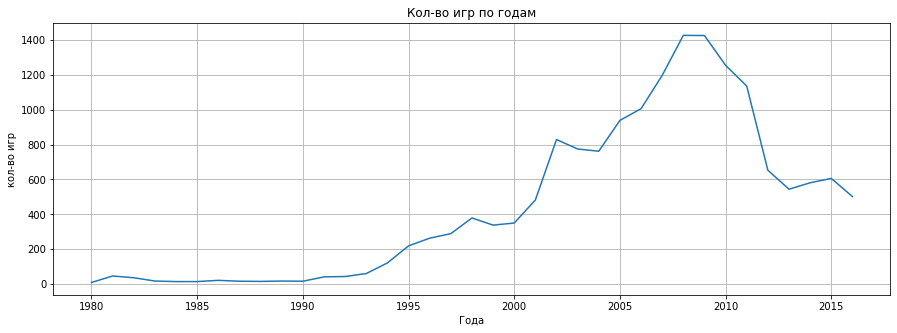

In [47]:
fig = plt.figure(figsize=(15, 5))
plt.plot(df_years.groupby('year')['name'].agg('count'))
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Кол-во игр по годам')
plt.grid(True)
plt.show()

Мы видим постепенный рост кол-ва игр до 2009 года, далее идет резкий спад, почему?

После 2009 года крупные компании, включая Electronic Arts, перешли к стратегии «Fewer, Bigger, Better». Вместо того, чтобы вбрасывать один тайтл за другим в надежде на то, что хотя бы один из них выстрелит, они стали вкладывать больше ресурсов в большие, но безопасные проекты, способные выдержать конкуренцию.

"Эта стратегия изменила индустрию во многих отношениях, позволяя издателям объединить большие открытые миры с графикой невиданного ранее качества, а также создать больше специализированных рабочих мест и карьерных путей в разработке ААА-проектов. Ожидания потребителей от фулл-прайс игр изменились, равно как и масштаб увольнений или реструктуризаций в результате неудачных проектов."

- Брендан Синклэр
автор gamesindustry.biz

Другими словами, игр стало меньше, но они стали лучше. Отсюда и спад.

С учетом стремительно развивающихся технлогий и индустрии игр, чтобы спрогнозировать что-либо на 2017 год - необходимо брать данные за последние года.

Посмотрим, как менялись продажи по платформам.

In [48]:
df_platforms = df_years.groupby('platform')['name'].agg('count').sort_values(ascending=False)

In [49]:
df_platforms = df_platforms.reset_index().rename_axis(None, axis=1)

In [50]:
df_platforms

,platform,name
0,PS2,2127
1,DS,2121
2,PS3,1306
3,Wii,1286
4,X360,1232
5,PSP,1193
6,PS,1190
7,PC,957
8,GBA,811
9,XB,803


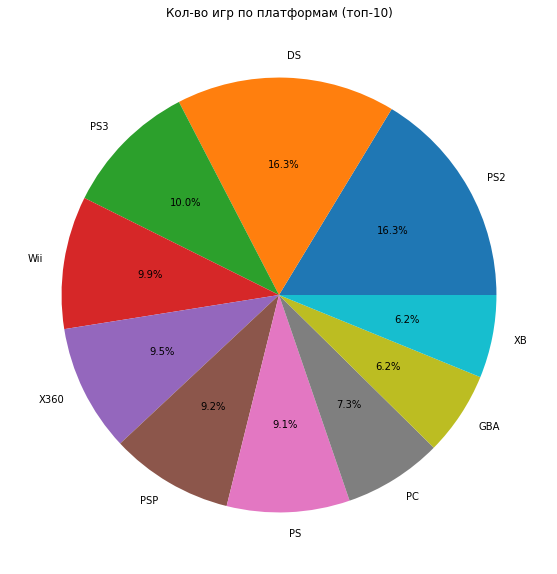

In [51]:
fig = plt.figure(figsize=(10, 10))
plt.pie(df_platforms['name'].head(10), labels =df_platforms['platform'].head(10), autopct='%1.1f%%' )
plt.title('Кол-во игр по платформам (топ-10)')
plt.show()

По общему числу  игр лидирует PS2,  Nintendo DS и PS3.

Посмотрим на распредление по годам.

In [52]:
df_platforms_years = df_years.groupby(['platform', 'year'])['name'].agg('count').sort_values(ascending=False)

In [53]:
df_platforms_years = df_platforms_years.reset_index().rename_axis(None, axis=1)

In [54]:
df_platforms_years.head(10)

,platform,year,name
0,DS,2008,492
1,DS,2009,403
2,DS,2007,376
3,Wii,2009,325
4,DS,2010,323
5,Wii,2008,282
6,PS2,2002,280
7,PS2,2005,260
8,PS2,2004,259
9,PS2,2006,259


Напишем функцию, чтобы собрать информацию по всем платформам.

In [55]:
def magic(z,y):
    x = z[z['platform']== y]
    x = x.sort_values(by='year')
    return x
    

In [56]:
DS = magic(df_platforms_years,'DS')
PS2 = magic(df_platforms_years,'PS2')
PS3 =magic(df_platforms_years,'PS3')
Wii =magic(df_platforms_years,'Wii')
X360=magic(df_platforms_years,'X360')
PSP=magic(df_platforms_years,'PSP')
PS=magic(df_platforms_years,'PS')
PC=magic(df_platforms_years,'PC')
GBA=magic(df_platforms_years,'GBA')
XB=magic(df_platforms_years,'XB')
GC=magic(df_platforms_years,'GC')
DS3=magic(df_platforms_years,'3DS')
PSV=magic(df_platforms_years,'PSV')
PS4=magic(df_platforms_years,'PS4')
N64=magic(df_platforms_years,'N64')
XOne=magic(df_platforms_years,'XOne')
SNES=magic(df_platforms_years,'SNES')
SAT=magic(df_platforms_years,'SAT')
WiiU=magic(df_platforms_years,'WiiU')
A2600=magic(df_platforms_years,'2600')


Для удобства восприятия, будем выводить по 5 платформ на одном графике, в порядке убывания общего числа игр.
    

In [57]:
DS

,platform,year,name
231,DS,1985,1
130,DS,2004,23
53,DS,2005,118
16,DS,2006,201
2,DS,2007,376
0,DS,2008,492
1,DS,2009,403
4,DS,2010,323
38,DS,2011,153
129,DS,2012,23


In [58]:
DS = DS.query('year != 1985')#убираем аномалию, DS была выпущена в 2004 году.

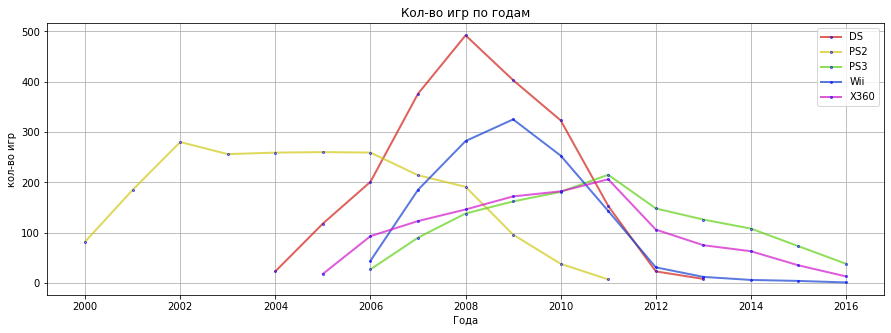

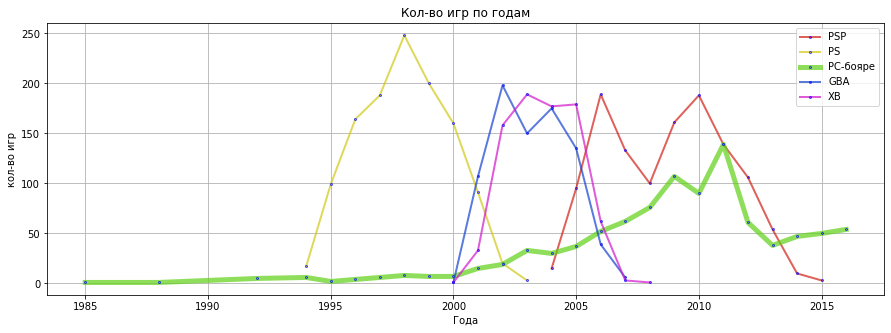

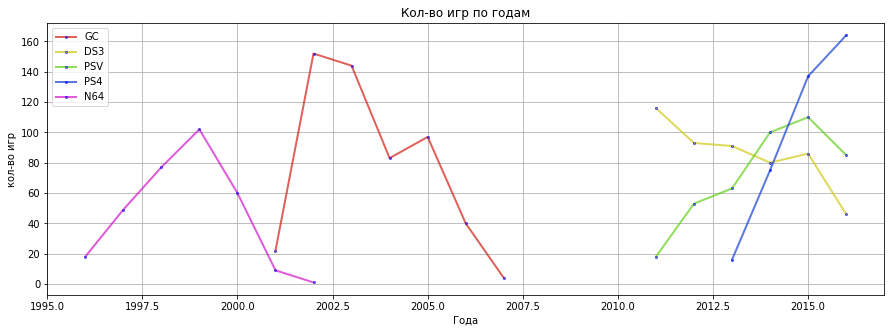

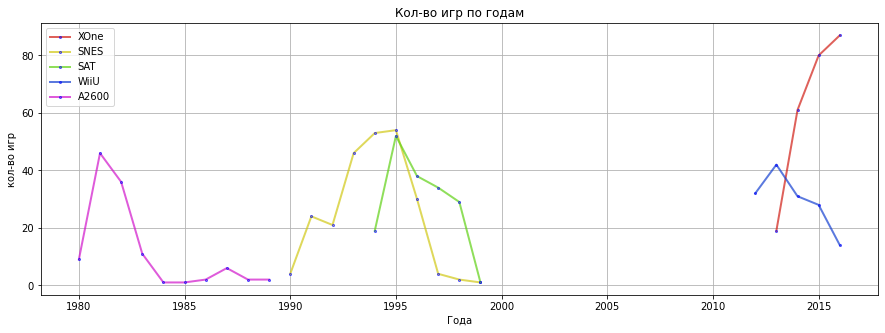

In [59]:
plt.figure(figsize=(15, 5))
plt.plot(DS['year'], DS['name'], 'o-r', alpha=0.7, label="DS", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(PS2['year'], PS2['name'], 'o-r', alpha=0.7, label="PS2", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(PS3['year'], PS3['name'], 'o-r', alpha=0.7, label="PS3", lw=2, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(Wii['year'], Wii['name'], 'o-r', alpha=0.7, label="Wii", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(X360['year'], X360['name'], 'o-r', alpha=0.7, label="X360", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Кол-во игр по годам')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(PSP['year'], PSP['name'], 'o-r', alpha=0.7, label="PSP", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(PS['year'], PS['name'], 'o-r', alpha=0.7, label="PS", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(PC['year'], PC['name'], 'o-r', alpha=0.7, label="PC-бояре", lw=5, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(GBA['year'], GBA['name'], 'o-r', alpha=0.7, label="GBA", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(XB['year'], XB['name'], 'o-r', alpha=0.7, label="XB", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Кол-во игр по годам')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 5))
plt.plot(GC['year'], GC['name'], 'o-r', alpha=0.7, label="GC", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(DS3['year'], DS3['name'], 'o-r', alpha=0.7, label="DS3", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(PSV['year'], PSV['name'], 'o-r', alpha=0.7, label="PSV", lw=2, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(PS4['year'], PS4['name'], 'o-r', alpha=0.7, label="PS4", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(N64['year'], N64['name'], 'o-r', alpha=0.7, label="N64", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Кол-во игр по годам')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 5))
plt.plot(XOne['year'], XOne['name'], 'o-r', alpha=0.7, label="XOne", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(SNES['year'], SNES['name'], 'o-r', alpha=0.7, label="SNES", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(SAT['year'], SAT['name'], 'o-r', alpha=0.7, label="SAT", lw=2, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(WiiU['year'], WiiU['name'], 'o-r', alpha=0.7, label="WiiU", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(A2600['year'], A2600['name'], 'o-r', alpha=0.7, label="A2600", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Кол-во игр по годам')
plt.legend()
plt.grid(True)
plt.show();

#### Вывод: На графиках видно, как рождаются и умирают платформы, средний срок жизни платформ мы можем определить в 7-10 лет. Исключение составляет ПК, это едиственная платформа, на которой без перерыва выходили игры начиная с 1985 года. 


### Как менялись продажи по платформам?

In [60]:
df_years

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating,real_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Everyone,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Everyone,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Everyone,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,no rating,0.01


In [61]:
platform_income = df_years.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)
platform_income = platform_income.reset_index().rename_axis(None, axis =1)
platform_income.head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


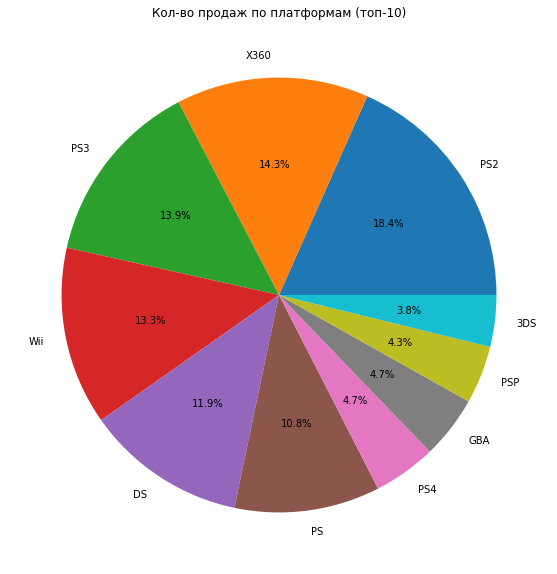

In [62]:
fig = plt.figure(figsize=(10, 10))
plt.pie(platform_income['total_sales'].head(10), labels =platform_income['platform'].head(10), autopct='%1.1f%%' )
plt.title('Кол-во продаж по платформам (топ-10)')
plt.show()


лидеры: PS2, X360, PS3

Посмотрим на продажи по годам:

In [63]:
platform_income_year = df_years.groupby(['platform','year'])['total_sales'].agg('sum').sort_values(ascending=False)
platform_income_year = platform_income_year.reset_index().rename_axis(None, axis =1)
platform_income_year.head(10)


,platform,year,total_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


In [64]:
DS = magic(platform_income_year,'DS')
PS2 = magic(platform_income_year,'PS2')
PS3 =magic(platform_income_year,'PS3')
Wii =magic(platform_income_year,'Wii')
X360=magic(platform_income_year,'X360')
PSP=magic(platform_income_year,'PSP')
PS=magic(platform_income_year,'PS')
PC=magic(platform_income_year,'PC')
GBA=magic(platform_income_year,'GBA')
XB=magic(platform_income_year,'XB')
GC=magic(platform_income_year,'GC')
DS3=magic(platform_income_year,'3DS')
PSV=magic(platform_income_year,'PSV')
PS4=magic(platform_income_year,'PS4')
N64=magic(platform_income_year,'N64')
XOne=magic(platform_income_year,'XOne')
SNES=magic(platform_income_year,'SNES')
SAT=magic(platform_income_year,'SAT')
WiiU=magic(platform_income_year,'WiiU')
A2600=magic(platform_income_year,'2600')
DS = DS.query('year != 1985')

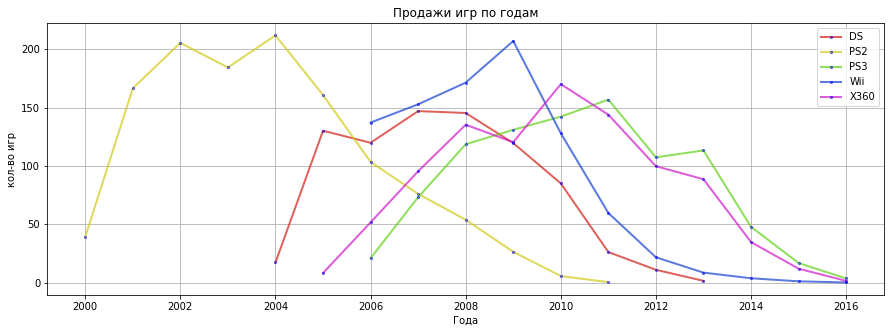

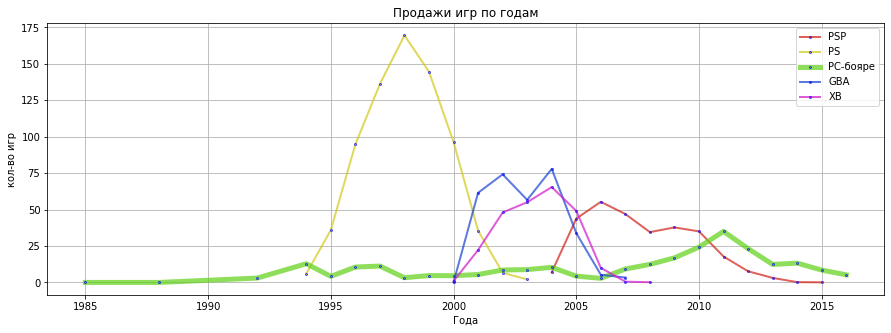

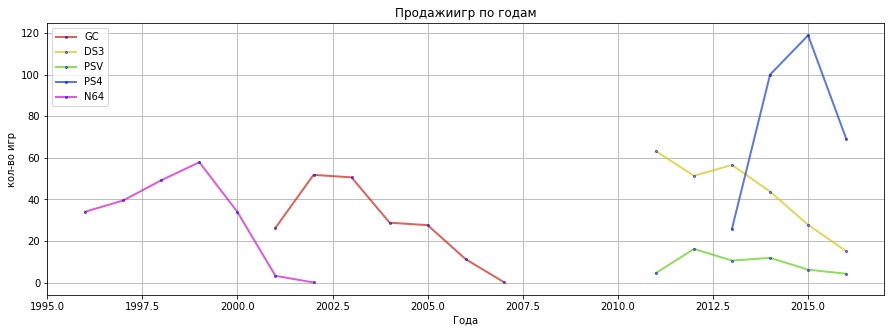

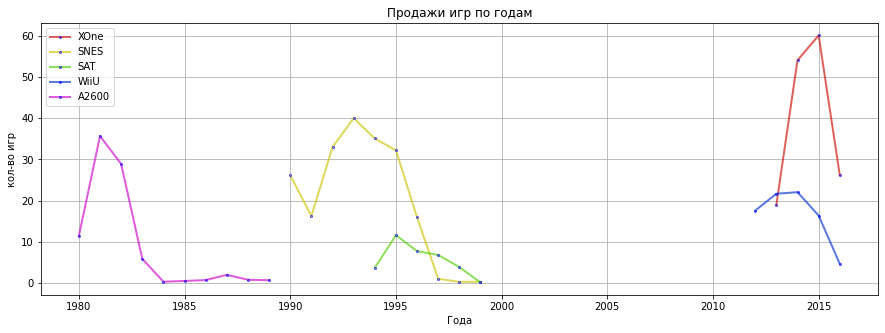

In [65]:
plt.figure(figsize=(15, 5))
plt.plot(DS['year'], DS['total_sales'], 'o-r', alpha=0.7, label="DS", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(PS2['year'], PS2['total_sales'], 'o-r', alpha=0.7, label="PS2", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(PS3['year'], PS3['total_sales'], 'o-r', alpha=0.7, label="PS3", lw=2, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(Wii['year'], Wii['total_sales'], 'o-r', alpha=0.7, label="Wii", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(X360['year'], X360['total_sales'], 'o-r', alpha=0.7, label="X360", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Продажи игр по годам')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(PSP['year'], PSP['total_sales'], 'o-r', alpha=0.7, label="PSP", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(PS['year'], PS['total_sales'], 'o-r', alpha=0.7, label="PS", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(PC['year'], PC['total_sales'], 'o-r', alpha=0.7, label="PC-бояре", lw=5, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(GBA['year'], GBA['total_sales'], 'o-r', alpha=0.7, label="GBA", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(XB['year'], XB['total_sales'], 'o-r', alpha=0.7, label="XB", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Продажи игр по годам')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 5))
plt.plot(GC['year'], GC['total_sales'], 'o-r', alpha=0.7, label="GC", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(DS3['year'], DS3['total_sales'], 'o-r', alpha=0.7, label="DS3", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(PSV['year'], PSV['total_sales'], 'o-r', alpha=0.7, label="PSV", lw=2, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(PS4['year'], PS4['total_sales'], 'o-r', alpha=0.7, label="PS4", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(N64['year'], N64['total_sales'], 'o-r', alpha=0.7, label="N64", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Продажиигр по годам')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 5))
plt.plot(XOne['year'], XOne['total_sales'], 'o-r', alpha=0.7, label="XOne", lw=2, mec='b', mew=2, ms=1,color = '#d11e15')
plt.plot(SNES['year'], SNES['total_sales'], 'o-r', alpha=0.7, label="SNES", lw=2, mec='b', mew=2, ms=1,color = '#d1c815')
plt.plot(SAT['year'], SAT['total_sales'], 'o-r', alpha=0.7, label="SAT", lw=2, mec='b', mew=2, ms=1,color = '#60d115')
plt.plot(WiiU['year'], WiiU['total_sales'], 'o-r', alpha=0.7, label="WiiU", lw=2, mec='b', mew=2, ms=1,color = '#1541d1')
plt.plot(A2600['year'], A2600['total_sales'], 'o-r', alpha=0.7, label="A2600", lw=2, mec='b', mew=2, ms=1,color = '#d115cb')
plt.xlabel('Года')
plt.ylabel('кол-во игр')
plt.title('Продажи игр по годам')
plt.legend()
plt.grid(True)
plt.show();

#### Вывод: 
Мы хорошо видим, что продажи большинства игр падают к 2015 году, исключение составляет PS4 и XOne, продажи игр на этих двух консолях летят вверх в 2015 году. Также мы наблюдаем тенденцию консолей - они все имеют пик через некоторое время со старта продаж, а потом плавное затухание и прекращение продаж. Вероятней всего это связано с "устареванием" консолей.

Исходя из полученных данных - для прогнозирования потенциально популярного продукта мы должны учитывать:

1) Поколение консолей

2) Быстрый рост качества продукта. 

Для анализа возьмем данные за последние 5 лет. Дальше - не имеет смысла, там были совсем другие консоли и совсем другое качество. 


### Актуальные данные

In [66]:
final_df = df.query('year >=2010')

In [67]:
final_df

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating,real_rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,Everyone,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Mature 17+,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,Mature 17+,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0.0,0.0,NaN,no rating,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,Mature 17+,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,no rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,NaN,no rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,no rating,0.01


#### Анализ продаж

In [68]:
income_top = final_df.groupby(['platform','year'])['total_sales'].agg('sum').sort_values(ascending=False)
income_top = income_top.reset_index().rename_axis(None, axis =1)
income_top.head(10)

,platform,year,total_sales
0,X360,2010,170.03
1,PS3,2011,156.78
2,X360,2011,143.84
3,PS3,2010,142.17
4,Wii,2010,127.95
5,PS4,2015,118.90
6,PS3,2013,113.25
7,PS3,2012,107.36
8,PS4,2014,100.00
9,X360,2012,99.74


In [69]:
income_top['platform'].unique() #12 консолей


array(['X360', 'PS3', 'Wii', 'PS4', 'DS', '3DS', 'XOne', 'PSP', 'PC',
       'WiiU', 'PSV', 'PS2'], dtype=object)

In [70]:
income_top_2 = final_df.groupby(['platform','year'])['total_sales'].agg('sum')
income_top_2

platform  year
3DS       2011    63.20
          2012    51.36
          2013    56.57
          2014    43.76
          2015    27.78
                  ...  
X360      2016     1.52
XOne      2013    18.96
          2014    54.07
          2015    60.14
          2016    26.15
Name: total_sales, Length: 65, dtype: float64

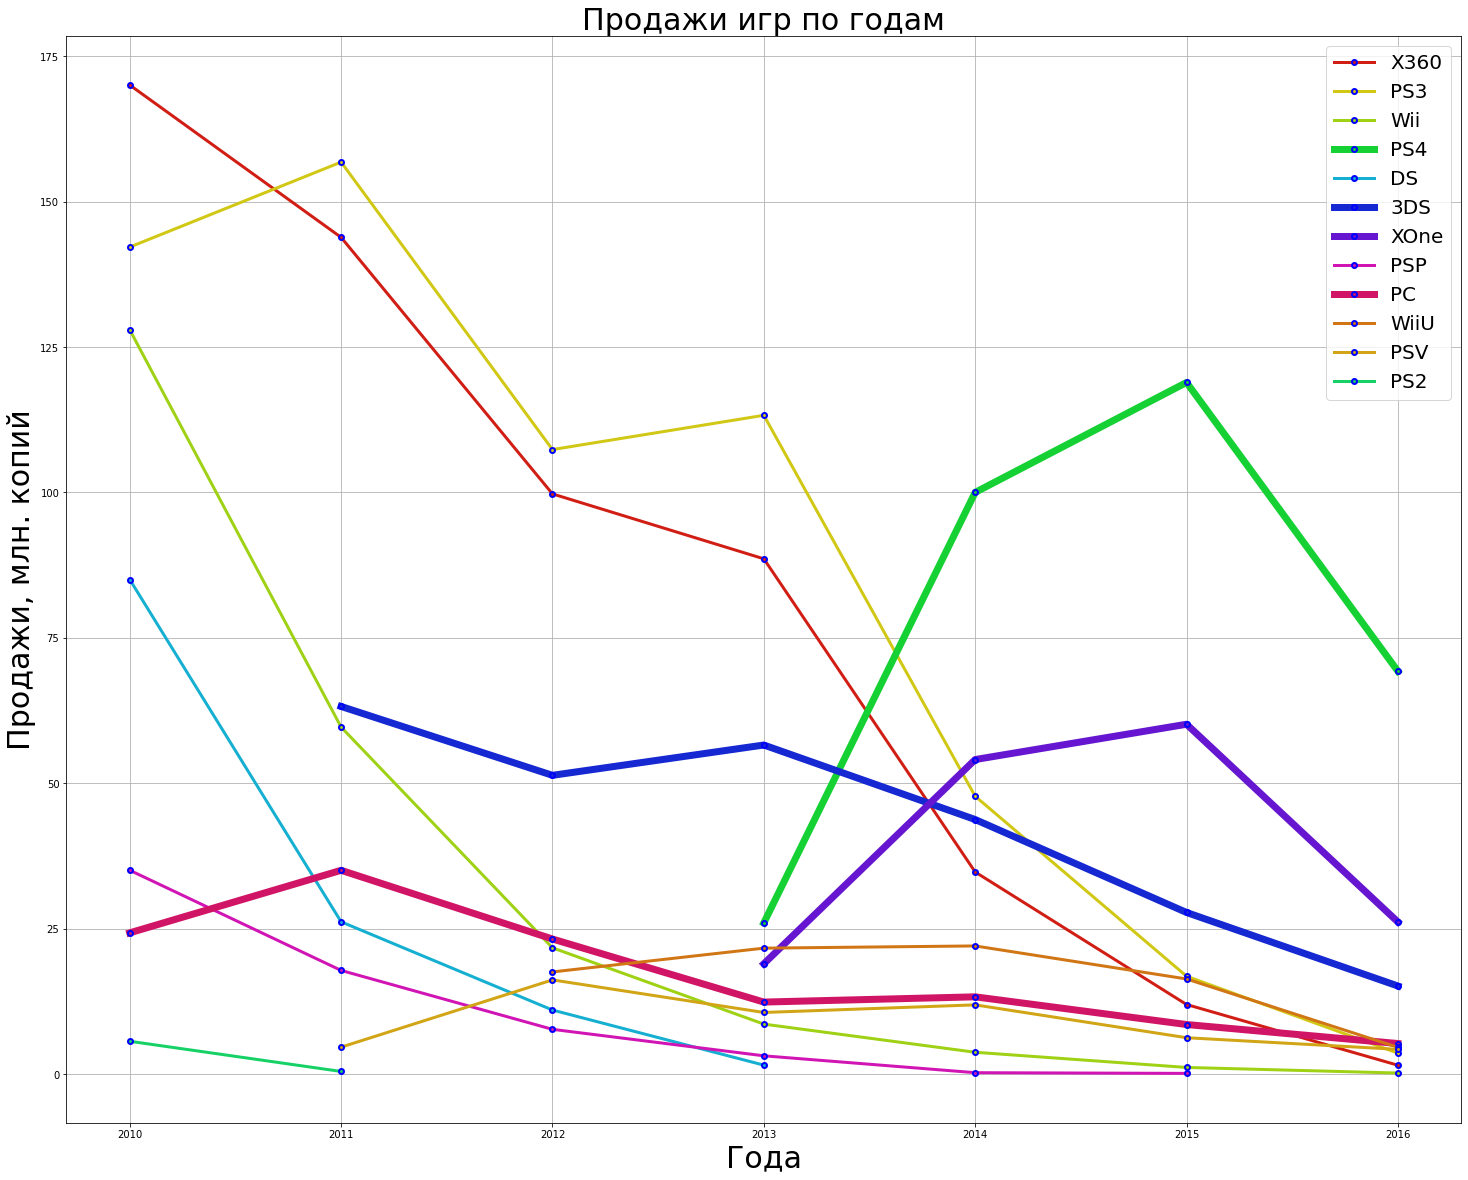

In [71]:
plt.figure(figsize=(25,20))
plt.plot(income_top_2['X360'], 'o-r', alpha=1, label="X360", lw=3, mec='b', mew=2, ms=5,color = '#d11e15')
plt.plot(income_top_2['PS3'], 'o-r', alpha=1, label="PS3", lw=3, mec='b', mew=2, ms=5,color = '#d1c815')
plt.plot(income_top_2['Wii'], 'o-r', alpha=1, label="Wii", lw=3, mec='b', mew=2, ms=5,color = '#9fd115')
plt.plot(income_top_2['PS4'], 'o-r', alpha=1, label="PS4", lw=7, mec='b', mew=2, ms=5,color = '#15d134')
plt.plot(income_top_2['DS'], 'o-r', alpha=1, label="DS", lw=3, mec='b', mew=2, ms=5,color = '#15afd1')
plt.plot(income_top_2['3DS'], 'o-r', alpha=1, label="3DS", lw=7, mec='b', mew=2, ms=5,color = '#1528d1')
plt.plot(income_top_2['XOne'], 'o-r', alpha=1, label="XOne", lw=7, mec='b', mew=2, ms=5,color = '#6615d1')
plt.plot(income_top_2['PSP'], 'o-r', alpha=1, label="PSP", lw=3, mec='b', mew=2, ms=5,color = '#d115b5')
plt.plot(income_top_2['PC'], 'o-r', alpha=1, label="PC", lw=7, mec='b', mew=2, ms=5,color = '#d11566')
plt.plot(income_top_2['WiiU'], 'o-r', alpha=1, label="WiiU", lw=3, mec='b', mew=2, ms=5,color = '#d17615')
plt.plot(income_top_2['PSV'], 'o-r', alpha=1, label="PSV", lw=3, mec='b', mew=2, ms=5,color = '#d1a515')
plt.plot(income_top_2['PS2'], 'o-r', alpha=1, label="PS2", lw=3, mec='b', mew=2, ms=5,color = '#15d166')

plt.xlabel('Года', fontsize=30)
plt.ylabel('Продажи, млн. копий', fontsize=30)
plt.title('Продажи игр по годам', fontsize=30)
plt.legend( fontsize=20)
plt.grid(True)
plt.show() # оказывается, не нужно писать функции для построения графиков

Можем выделить 3 лидера продаж:
1) PS4

2) Xone

3) 3DS

Только у этих консолей продажи за 2015 год перешагивают 25 млн копий. По графику можно сделать вывод, что PS4  и Xone не смотря на падение к 2016 году будут и дальше лидировать, что не скажешь о 3DS, эта платформа потихоньку затухает.


#### Boxplot по глобальным продажам игр в разбивке по платформам

In [72]:
platfroms_total = final_df.groupby(['platform','year'])['total_sales'].agg('sum')
platfroms_total = platfroms_total.reset_index().rename_axis(None, axis =1)

platfroms_total.head(10)

,platform,year,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DS,2010,85.02
7,DS,2011,26.18
8,DS,2012,11.01
9,DS,2013,1.54


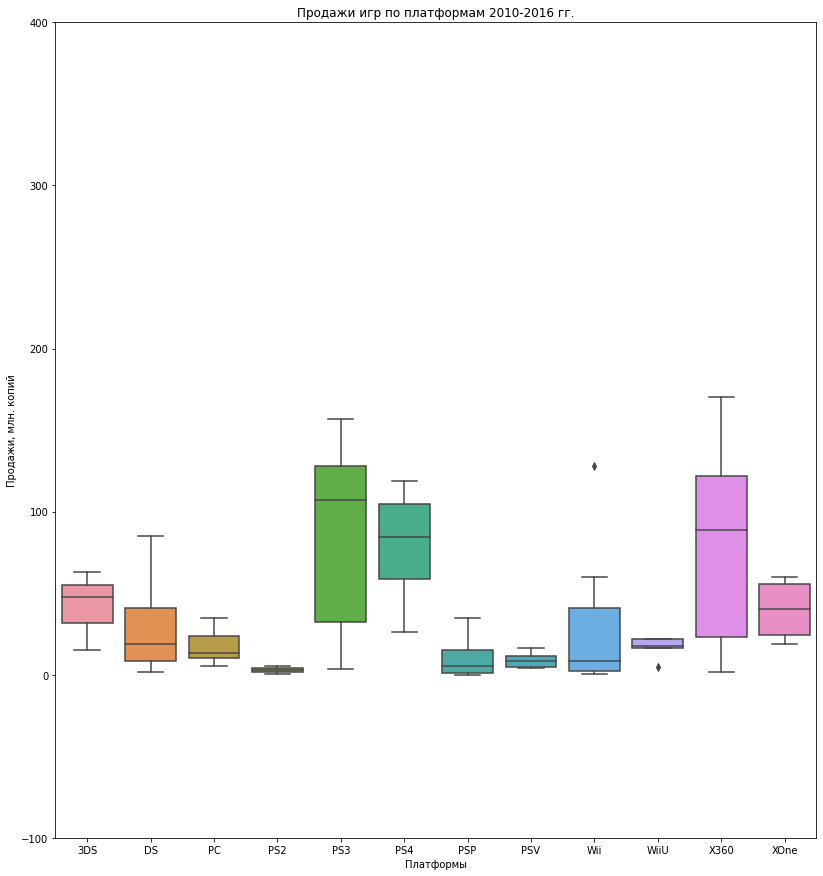

In [73]:
plt.figure(figsize=(30,15))
plt.subplot(121)
x=platfroms_total['platform']
y=platfroms_total['total_sales']
plt.ylim(-100,400)
sns.boxplot(x,y)

plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title("Продажи игр по платформам 2010-2016 гг.")
plt.show()


Видим, что больше всего продаж было у PS3 и X360 с огромными усами и медианами, смещенными вправо. Следующими за ними идут 3DS, а также Xone и PS4 - как раз платформы нового поколения, на которые мы делаем ставку, у них медианы более равномерно распределены по отношению к усам, однако эти платформы только начинают свой путь, и вероятно, через несколько лет мы увидим такой же разброс как и у их предшественников


In [74]:
final_df.query('platform == "Wii" ')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating,real_rating,total_sales
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,Everyone 10+,10.12
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+,Everyone 10+,9.44
79,Wii Party,Wii,2010,Misc,1.75,3.47,2.49,0.67,68.0,7.4,E,Everyone,8.38
97,Super Mario Galaxy 2,Wii,2010,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E,Everyone,7.51
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,Everyone 10+,6.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16359,Captain Morgane and the Golden Turtle,Wii,2012,Adventure,0.00,0.01,0.00,0.00,0.0,-99.0,NaN,no rating,0.01
16502,Aladdin Magic Racer,Wii,2011,Racing,0.01,0.00,0.00,0.00,0.0,0.0,E,Everyone,0.01
16534,The Cages: Pro Style Batting Practice,Wii,2010,Sports,0.01,0.00,0.00,0.00,0.0,-99.0,E,Everyone,0.01
16560,Transformers: Prime,Wii,2012,Action,0.00,0.01,0.00,0.00,0.0,0.0,NaN,no rating,0.01


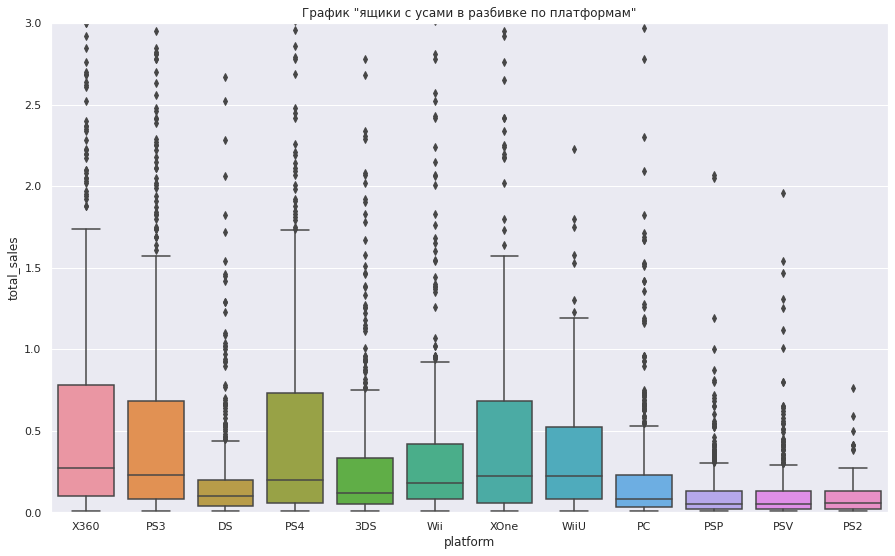

In [116]:
#Код ревьюера
plt.figure(figsize= (15, 9))
sns.boxplot(x = final_df['platform'], y = final_df['total_sales'])
plt.title('График "ящики с усами в разбивке по платформам"')
plt.ylim(0, 3)
plt.show()

#### Как отзывы пользователей и критиков влияют на продажи игр

Для анализа возьмем платформу с большим кол-вом отзывов

In [75]:
print(final_df['critic_score'].count())
print(final_df['user_score'].count())
print(final_df.query('critic_score >0')['critic_score'].count())
print(final_df.query('user_score >0')['user_score'].count()) # оценок пользоватлей больше, чем критиков, но не значительно

5277
5277
2312
2499


In [76]:
print(final_df.query('critic_score >0')['critic_score'].describe())
print(final_df.query('user_score >0')['user_score'].describe())

count    2312.000000
mean       70.454152
std        13.561583
min        13.000000
25%        62.000000
50%        73.000000
75%        80.000000
max        97.000000
Name: critic_score, dtype: float64
count    2499.000000
mean        6.678311
std         1.521214
min         0.200000
25%         5.900000
50%         7.000000
75%         7.800000
max         9.300000
Name: user_score, dtype: float64


In [77]:
critics = final_df.query('critic_score > 0')
critics_scr = critics.groupby('platform')['critic_score'].agg('count')
critics_scr.sort_values(ascending=False)

platform
PS3     475
X360    432
PC      350
PS4     252
XOne    169
3DS     166
Wii     125
PSV     119
WiiU     90
DS       76
PSP      57
PS2       1
Name: critic_score, dtype: int64

In [78]:
users = final_df.query('user_score > 0')
users_scr = users.groupby('platform')['user_score'].agg('count')
users_scr.sort_values(ascending=False)

platform
PS3     539
X360    495
PC      374
PS4     257
XOne    182
3DS     171
PSV     142
Wii     122
WiiU    100
PSP      60
DS       48
PS2       9
Name: user_score, dtype: int64

Больше всего отзывов у PS3, по ней и посмотрим влияение отзывов на продажи

In [79]:
score_sales_users = users.query('platform == "PS3"')[['total_sales','user_score']].reset_index(drop=True)
score_sales_users


,total_sales,user_score
0,21.05,8.2
1,13.79,5.3
2,13.33,3.2
3,12.63,6.4
4,10.70,7.5
...,...,...
534,0.02,6.8
535,0.01,7.9
536,0.02,5.0
537,0.01,6.9


In [80]:
score_sales_users.corr()


,total_sales,user_score
total_sales,1.000000,0.065092
user_score,0.065092,1.000000


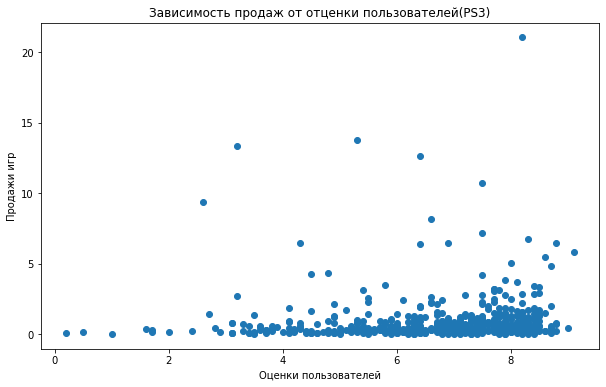

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_sales_users['user_score'], y = score_sales_users['total_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи игр")
plt.title('Зависимость продаж от отценки пользователей(PS3)')

plt.show()

Корреляция крайне мала - 0.065092, можно смело сказать об отсутствии зависимости оценок пользователей на продажи игр. Игроки не прислушиваются к мнению других игроков.

Для чистоты эксперимента попробуем оставить здесь только те игры, продажи которых достигли 0,5 млн. копий.


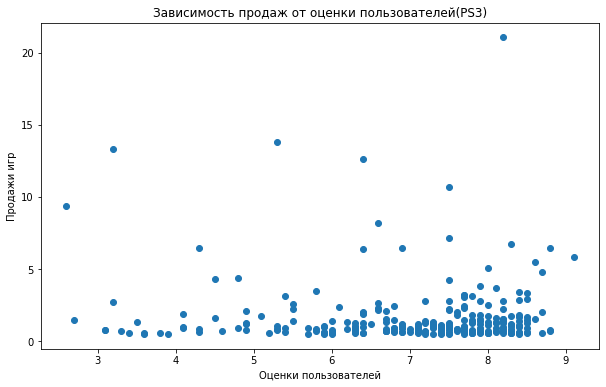

In [82]:
score_sales_users_top = score_sales_users.query('total_sales >= 0.5')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_sales_users_top['user_score'], y = score_sales_users_top['total_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи игр")
plt.title('Зависимость продаж от оценки пользователей(PS3)')

plt.show()


In [83]:
score_sales_users_top.corr()

,total_sales,user_score
total_sales,1.000000,-0.051454
user_score,-0.051454,1.000000


Зависимости нет. Посмотрим на влияение критиков на продажи

In [84]:
score_sales_critics = critics.query('platform == "PS3"')[['total_sales','critic_score']].reset_index(drop=True)
score_sales_critics


,total_sales,critic_score
0,21.05,97.0
1,13.79,83.0
2,13.33,88.0
3,12.63,88.0
4,10.70,84.0
...,...,...
470,0.01,82.0
471,0.02,50.0
472,0.01,38.0
473,0.01,73.0


In [85]:
score_sales_critics.corr()

,total_sales,critic_score
total_sales,1.000000,0.400594
critic_score,0.400594,1.000000


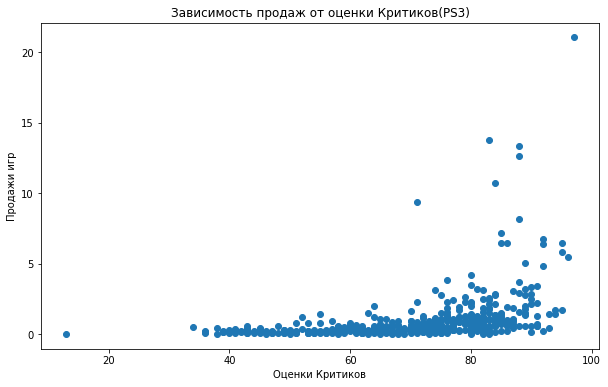

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_sales_critics['critic_score'], y = score_sales_critics['total_sales'])
plt.xlabel("Оценки Критиков")
plt.ylabel("Продажи игр")
plt.title('Зависимость продаж от оценки Критиков(PS3)')

plt.show()

Зависимость значительно сильнее, нежели у пользователей -0.400594. корреляция, хоть и очень слабая, но наблюдается. 

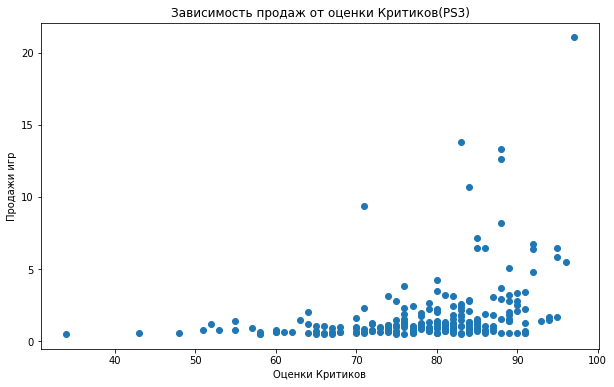

In [87]:
score_sales_critics_top = score_sales_critics.query('total_sales >= 0.5')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_sales_critics_top['critic_score'], y = score_sales_critics_top['total_sales'])
plt.xlabel("Оценки Критиков")
plt.ylabel("Продажи игр")
plt.title('Зависимость продаж от оценки Критиков(PS3)')

plt.show()


In [88]:
score_sales_critics_top.corr()

,total_sales,critic_score
total_sales,1.00000,0.33614
critic_score,0.33614,1.00000


На популярных играх зависимость слабее.

#### Вывод: 
1) Зависимость  продаж от оценки пользователей отстутсвует. 

2) Зависимость  продаж от оценки критиков очень слаба. 

Мы рассмотрели самую популярную платформу, давайте посмотрим как обстоят дела с остальным датафреймом

In [89]:
total_rating_critic = final_df.query('critic_score>0')
total_rating_critic_group = total_rating_critic[['total_sales','critic_score']].reset_index(drop=True)
total_rating_critic_group

,total_sales,critic_score
0,21.82,61.0
1,21.05,97.0
2,16.27,97.0
3,14.73,88.0
4,14.62,87.0
...,...,...
2307,0.01,81.0
2308,0.01,74.0
2309,0.01,80.0
2310,0.01,61.0


In [90]:
total_rating_critic_group.corr()

,total_sales,critic_score
total_sales,1.000000,0.317012
critic_score,0.317012,1.000000


Общая зависимость продаж от оценок критиков тоже очень слаба

In [91]:
total_rating_users = final_df.query('user_score>0')
total_rating_users_group = total_rating_users[['total_sales','user_score']].reset_index(drop=True)
total_rating_users_group

,total_sales,user_score
0,21.82,6.3
1,21.05,8.2
2,16.27,8.1
3,14.73,3.4
4,14.62,6.3
...,...,...
2494,0.01,5.1
2495,0.01,6.7
2496,0.01,7.6
2497,0.01,5.8


In [92]:
total_rating_users_group.corr()

,total_sales,user_score
total_sales,1.000000,0.055365
user_score,0.055365,1.000000


Зависимости продаж от оценок пользователей почти нет. 

In [118]:

popular_platforms_list = ['PS3', 'X360', 'XOne', '3DS', 'WiiU', 'Wii']

for value in popular_platforms_list:
  print(value)
  print('Коэффициент корреляции оценок критиков и total_sales')
  print(final_df[final_df['platform'] == value].dropna()['critic_score']\
        .corr(final_df[final_df['platform'] == value].dropna()['total_sales']))
  print('Коэффициент корреляции оценок пользователей и total_sales')
  print(final_df[final_df['platform'] == value].dropna()['user_score']\
        .corr(final_df[final_df['platform'] == value].dropna()['total_sales']))
  print()

PS3
Коэффициент корреляции оценок критиков и total_sales
0.2928182634656313
Коэффициент корреляции оценок пользователей и total_sales
0.15562941884603787

X360
Коэффициент корреляции оценок критиков и total_sales
0.29308243088499597
Коэффициент корреляции оценок пользователей и total_sales
0.13040856573040832

XOne
Коэффициент корреляции оценок критиков и total_sales
0.36201310561412164
Коэффициент корреляции оценок пользователей и total_sales
0.15432723662683576

3DS
Коэффициент корреляции оценок критиков и total_sales
0.28623166600555505
Коэффициент корреляции оценок пользователей и total_sales
0.18947291832093113

WiiU
Коэффициент корреляции оценок критиков и total_sales
0.3382790010468989
Коэффициент корреляции оценок пользователей и total_sales
0.13519342660276892

Wii
Коэффициент корреляции оценок критиков и total_sales
0.3187504424695921
Коэффициент корреляции оценок пользователей и total_sales
0.31644549505219755



#### Общее распределение игр по жанрам

Взглянем на жанры, какие из них более прибыльны, каких больше.

In [93]:
genres = final_df.groupby('genre')['total_sales'].agg('sum')
genres = genres.sort_values(ascending=False)
genres = genres.reset_index().rename_axis(None, axis=1)
genres

,genre,total_sales
0,Action,673.09
1,Shooter,479.74
2,Sports,328.39
3,Role-Playing,315.28
4,Misc,234.56
5,Racing,122.68
6,Platform,119.72
7,Fighting,81.59
8,Simulation,71.75
9,Adventure,61.00


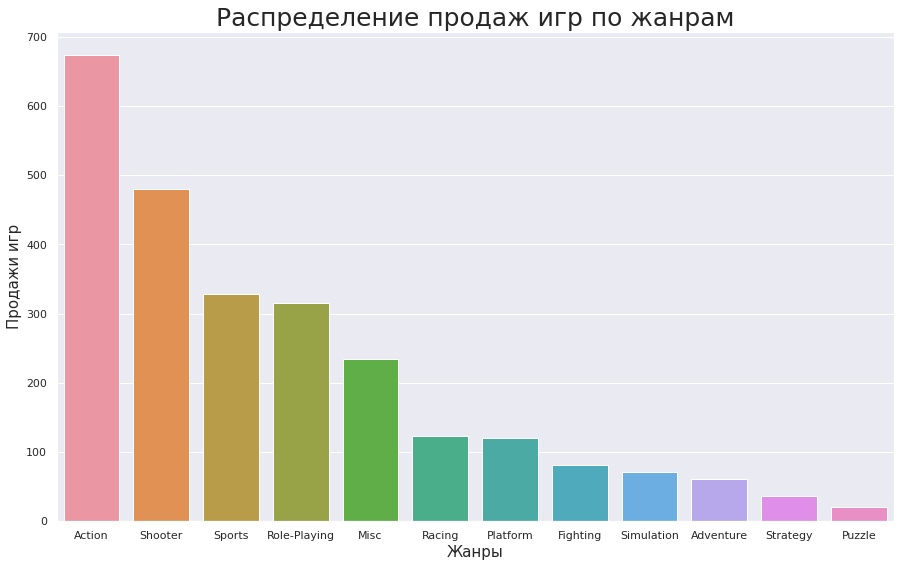

In [94]:
sns.set(rc={'figure.figsize':(15,9)})

sns.barplot(data = genres, x ='genre' , y = 'total_sales');
plt.xlabel("Жанры", size=15)
plt.ylabel("Продажи игр", size=15)
plt.title('Распределение продаж игр по жанрам', size=25);


Лучше всего продаются Экшн игры, потом идут Шутеры. Хуже всех - Стратегии и Пазлы. 

Возьмем медианные продажи, это реалистичнее покажет обстановку и исключит мега-популярные игры, которые делают огромные чеки


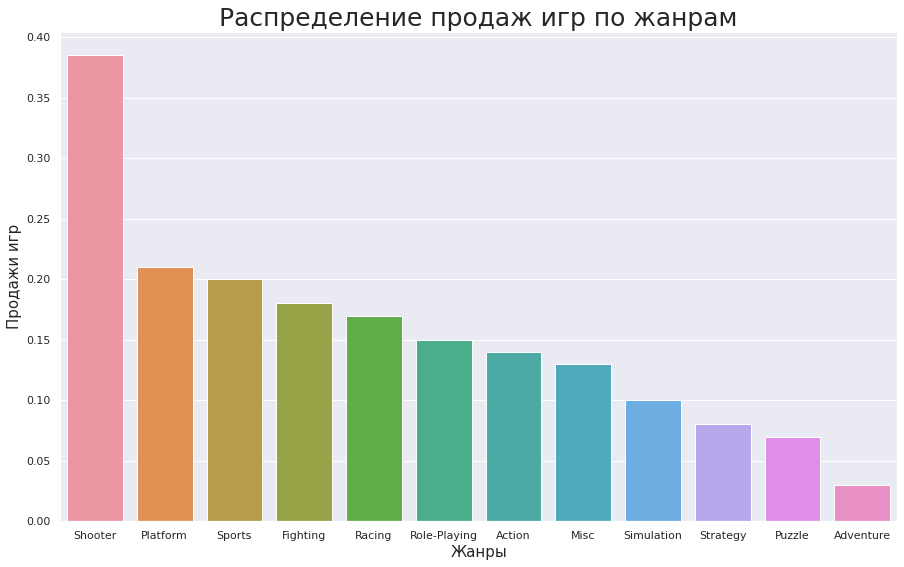

In [95]:
genres_median = final_df.groupby('genre')['total_sales'].agg('median')
genres_median = genres_median.sort_values(ascending=False)
genres_median = genres_median.reset_index().rename_axis(None, axis=1)
sns.set(rc={'figure.figsize':(15,9)})

sns.barplot(data = genres_median, x ='genre' , y = 'total_sales');
plt.xlabel("Жанры", size=15)
plt.ylabel("Продажи игр", size=15)
plt.title('Распределение продаж игр по жанрам', size=25);

В топе находятся Шутеры, потом идет платформеры, спорт, файтинг и гонки

Интересно, почему идет такая разница, если брать не медиану, а  общую выручку

In [96]:
final_df.sort_values(by = 'total_sales', ascending=False).head(15)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,global_sales,critic_score,user_score,rating,real_rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,Everyone,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Mature 17+,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,Mature 17+,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0.0,0.0,NaN,no rating,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,Mature 17+,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,no rating,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,Mature 17+,14.62
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,NaN,no rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,Mature 17+,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,Mature 17+,13.68


Grand Theft Auto V - абсолютный хит продаж, еще и на разных платформах. Вот откуда такой перекос. 

Интересно, какая картина будет по интересующим нас больше всего платформам - Xone и PS4(платформы нового поколения с самыми высокими продажами)

In [97]:
PS4_final_df = final_df.query('platform == "PS4"')

PS4_genres = PS4_final_df.groupby('genre')['total_sales'].agg('median')
PS4_genres = PS4_genres.sort_values(ascending=False)
PS4_genres = PS4_genres.reset_index().rename_axis(None, axis=1)

XOne_final_df = final_df.query('platform == "XOne"')

XOne_genres = XOne_final_df.groupby('genre')['total_sales'].agg('median')
XOne_genres = XOne_genres.sort_values(ascending=False)
XOne_genres = XOne_genres.reset_index().rename_axis(None, axis=1)

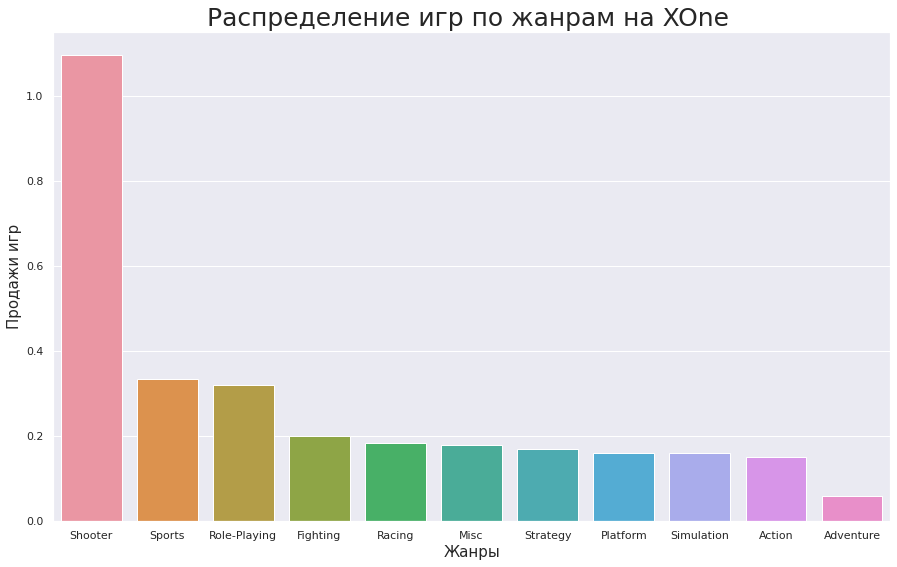

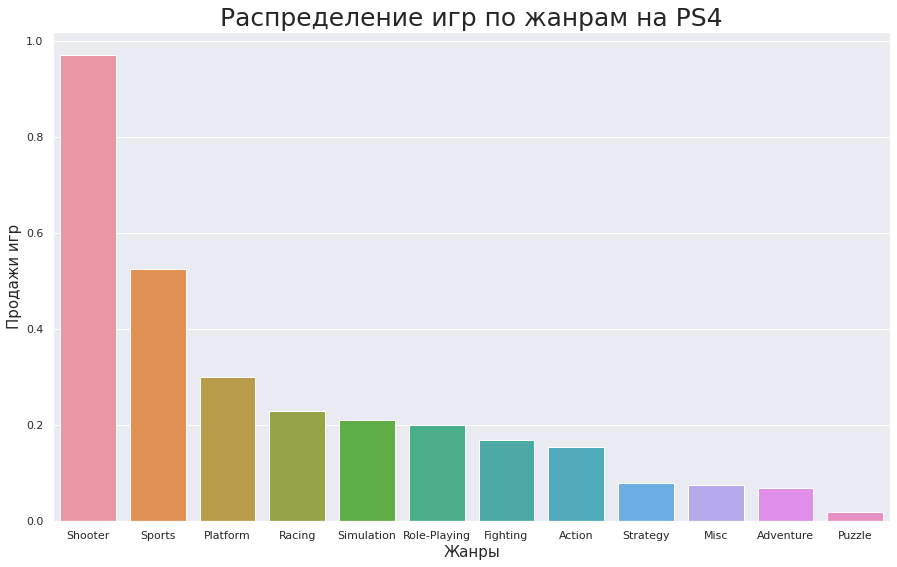

In [98]:
sns.set(rc={'figure.figsize':(15,9)})

sns.barplot(data = XOne_genres, x ='genre' , y = 'total_sales');
plt.xlabel("Жанры", size=15)
plt.ylabel("Продажи игр", size=15)
plt.title('Распределение игр по жанрам на XOne ', size=25)


plt.show()

sns.set(rc={'figure.figsize':(15,9)})

sns.barplot(data = PS4_genres, x ='genre' , y = 'total_sales');
plt.xlabel("Жанры", size=15)
plt.ylabel("Продажи игр", size=15)
plt.title('Распределение игр по жанрам на PS4', size=25)
plt.show()

Всем интересны Шутеры!

##### Вывод: Рейтинг продаж по жанрам:

1) Шутеры

2) Платформеры

3) Спорт


##  Портрет пользователей по региону

###  Популярные платформы по региону

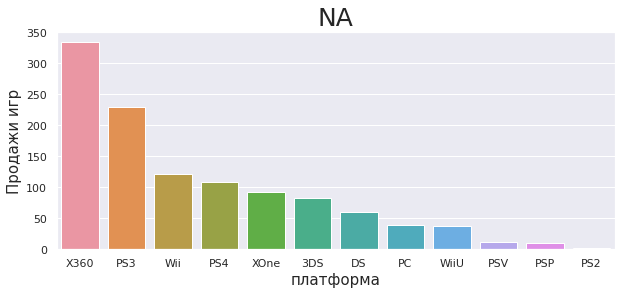

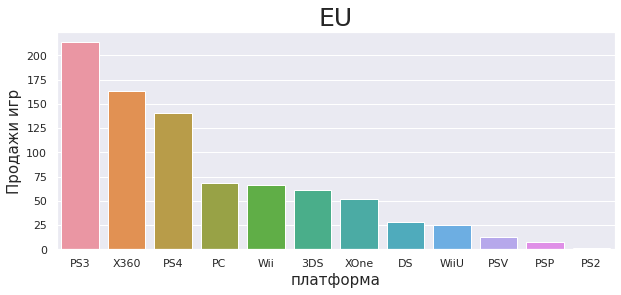

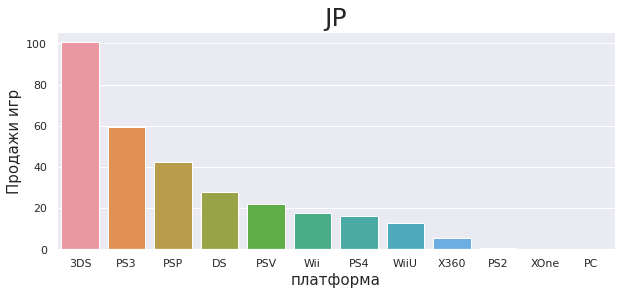

In [99]:
NA_platform= final_df.groupby('platform')['na_sales'].agg('sum')
NA_platform = NA_platform.sort_values(ascending=False)
NA_platform = NA_platform.reset_index().rename_axis(None, axis=1)

EU_platform= final_df.groupby('platform')['eu_sales'].agg('sum')
EU_platform = EU_platform.sort_values(ascending=False)
EU_platform = EU_platform.reset_index().rename_axis(None, axis=1)

JP_platform= final_df.groupby('platform')['jp_sales'].agg('sum')
JP_platform = JP_platform.sort_values(ascending=False)
JP_platform = JP_platform.reset_index().rename_axis(None, axis=1)


def bars(a,b,c,d):
    sns.set(rc={'figure.figsize':(10,4)})
    sns.barplot(data = a, x =b , y = c);
    plt.xlabel("платформа", size=15)
    plt.ylabel("Продажи игр", size=15)
    plt.title(d, size=25)
    plt.show()
    
bars(NA_platform, 'platform','na_sales','NA')
bars(EU_platform, 'platform','eu_sales','EU')
bars(JP_platform, 'platform','jp_sales','JP')



1) Америка: Лучшую прибыль делает X360, потом PS3, что не удивительно, X360 выпускает Microsoft Corporation - Американская компания. На 3ем месте Японская Wii. консоли нового поколения уже догоняют  - 4 и 5 место занимают PS4 и Xone соответствено. 

2) Европа: 1 место - Японская PS3, 2 - X 360, 3 - уже консоль нового поколения - PS4, Xone не попал даже в топ 5

3) Япония: 1 место  с огромным разрывом, далее PS3, далее PSPS, Microsoft Corporation нет даже близко. 


#### Выводы:  

Предпочтения игроков очень сильно отличаются в зависимоти от регионов, если Европа и Америка похожи, то Япония это совсем другой мир, Японцы славятся своей любовью к необычным и ретро играм. 

Объединяет 3 региона - хорошие продажи у PS3, однако для нас это консоль уже устарела, поэтому будем делать ставку на PS4 и Xone в Америке, на PS4 и PC в Европе. И на PS4 в Японии

###  Популярные жанры по региону

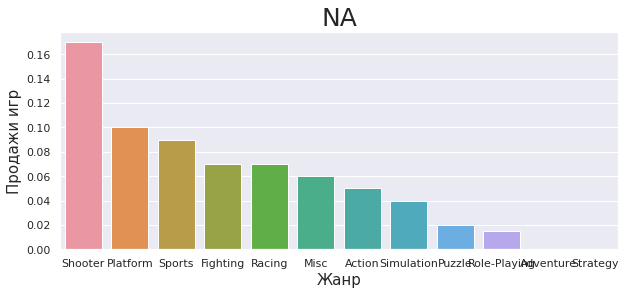

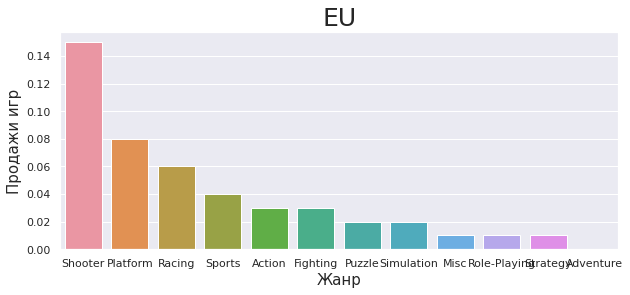

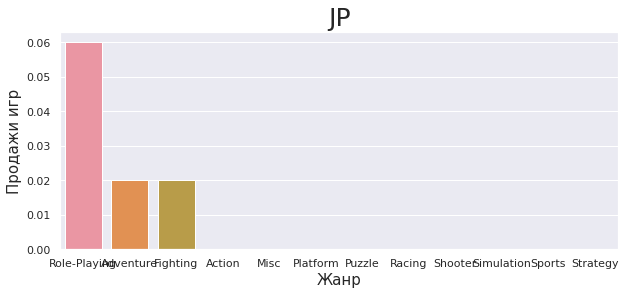

In [100]:
NA_genres= final_df.groupby('genre')['na_sales'].agg('median')
NA_genres = NA_genres.sort_values(ascending=False)
NA_genres = NA_genres.reset_index().rename_axis(None, axis=1)

EU_genres= final_df.groupby('genre')['eu_sales'].agg('median')
EU_genres = EU_genres.sort_values(ascending=False)
EU_genres = EU_genres.reset_index().rename_axis(None, axis=1)

JP_genres= final_df.groupby('genre')['jp_sales'].agg('median')
JP_genres = JP_genres.sort_values(ascending=False)
JP_genres = JP_genres.reset_index().rename_axis(None, axis=1)

def genr(a,b,c,d):
    sns.set(rc={'figure.figsize':(10,4)})
    sns.barplot(data = a, x =b , y = c);
    plt.xlabel("Жанр", size=15)
    plt.ylabel("Продажи игр", size=15)
    plt.title(d, size=25)
    plt.show()
    
genr(NA_genres, 'genre','na_sales','NA')
genr(EU_genres, 'genre','eu_sales','EU')
genr(JP_genres, 'genre','jp_sales','JP')    
    

#### Вывод

В Америке и Европе на первом месте Шутер, 2 - платформем. Далее, в Америке 3 - спортивные, 4  и 5 делят файтинг и гонки. В Европе 3 - гонки, 4 -Спорт, 5 - Экшн

В Японии на первом месте Ролевые игры, Приключения идет на втором, 3 - файтинг. Стоит Заметить, что по Японии у нас не так много данных для хорошего анализа.

У нас есть финалист - Шутер игры, они популярны везде, однако, если заходить на Японский рынок - нужно быть очень осторожным, у Японских пользователей совсем другой менталитет. 


### Влияние рейтингаг ESRB на продажи

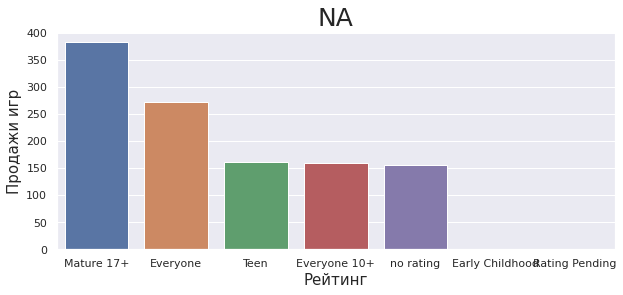

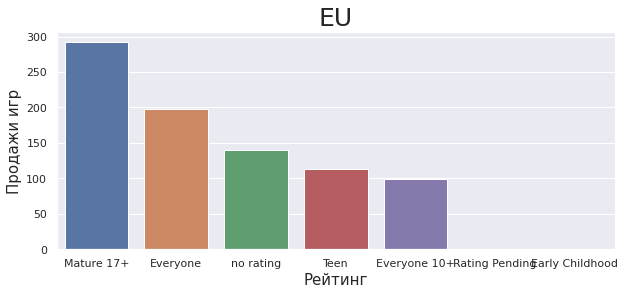

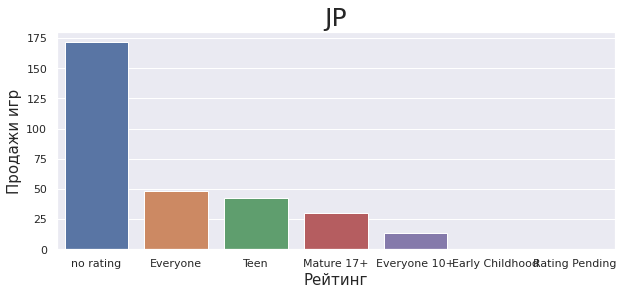

In [101]:
NA_rating= final_df.groupby('real_rating')['na_sales'].agg('sum')
NA_rating = NA_rating.sort_values(ascending=False)
NA_rating = NA_rating.reset_index().rename_axis(None, axis=1)

EU_rating= final_df.groupby('real_rating')['eu_sales'].agg('sum')
EU_rating = EU_rating.sort_values(ascending=False)
EU_rating = EU_rating.reset_index().rename_axis(None, axis=1)

JP_rating= final_df.groupby('real_rating')['jp_sales'].agg('sum')
JP_rating = JP_rating.sort_values(ascending=False)
JP_rating = JP_rating.reset_index().rename_axis(None, axis=1)

def genr(a,b,c,d):
    sns.set(rc={'figure.figsize':(10,4)})
    sns.barplot(data = a, x =b , y = c);
    plt.xlabel("Рейтинг", size=15)
    plt.ylabel("Продажи игр", size=15)
    plt.title(d, size=25)
    plt.show()
    
genr(NA_rating, 'real_rating','na_sales','NA')
genr(EU_rating, 'real_rating','eu_sales','EU')
genr(JP_rating, 'real_rating','jp_sales','JP')  

В Америке и Европе лидируют продажи с рейтингом "Для взрослых", на втором месте "Для всех", в Японии же первое метсо занимает "Для всех", потом идут "Подросткам", однако, в Японии отстуствует очень много данных, это связано с тем, что Японцы используют CERO вместо ESRB. 

### Вывод: 
Рынки Америки и Европы очень похожи, в топе продаж пребладают похожие жанры, рейтинги и консоли. Япония же, из-за своей культры и менталитета отличается кардинально.

Портреты целевых потребителей:

1) Америка : Предпочитает игры с рейтингом "Для взрослых", Жанр - Шутер, X360 или PS4(новое поколение)

2) Европа: Предпочитает игры с рейтингом "Для взрослых", Жанр - Шутер, PS3 или PS4(новое поколение)

3) Япония: Предпочитает игры с рейтингом "Для всех", Жанр - role-playing, 3DS или PS4(новое поколение)

## Проверяем гипотезы

Проверим 2 гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [102]:
Xbox_One = final_df.query('platform == "XOne" and user_score >0 ') #Делаем срезы


Xbox_One['user_score']

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [103]:
pc= final_df.query('platform == "PC" and user_score >0 ')
pc['user_score']

192      4.0
218      8.2
313      8.1
458      3.9
480      5.9
        ... 
16518    1.4
16584    7.9
16692    7.6
16696    5.8
16702    7.2
Name: user_score, Length: 374, dtype: float64

Проверка нормальности распределения:

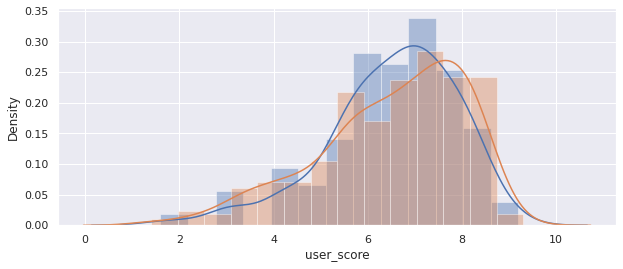

In [104]:
sns.distplot(Xbox_One['user_score']);
sns.distplot(pc['user_score']);

Проверка при помощи QQ-графиков:

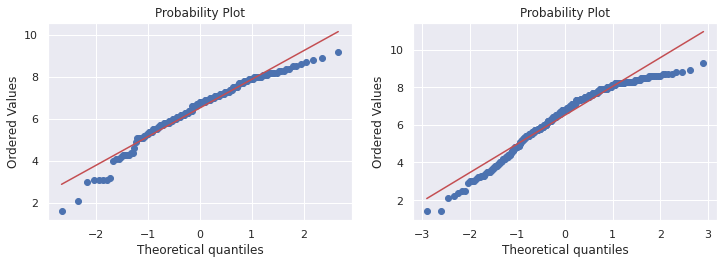

In [105]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(Xbox_One['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(pc['user_score'], dist="norm", plot=plt)
plt.show()

Распределение стремится к нормальному, но нормальным его назвать нельзя. Для начала проверим наши гипотезы t-тестом

Введем основную и альтернативные гипотезы:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
   H_1 :\text{ Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [106]:
alpha = 0.05


In [107]:
results = st.ttest_ind(Xbox_One['user_score'], pc['user_score'], equal_var=False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


Вывод: Не удалось отвергнуть нулевую гипотезу в пользу алтернативной

Используем для проверки непараметрический тест Манна-Уитни:

Введем основную и альтернативные гипотезы:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
   H_1 :\text{ Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [108]:
results = st.mannwhitneyu(Xbox_One['user_score'], pc['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5562864850569516
Не получилось отвергнуть нулевую гипотезу


Вывод: Не удалось отвергнуть нулевую гипотезу в пользу алтернативной

#### Вывод: 
Мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

In [109]:
action = final_df.query('user_score > 0 and genre == "Action"')
action['user_score']

16       8.2
23       8.1
42       8.3
81       6.6
118      8.3
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 779, dtype: float64

In [110]:
sports = final_df.query('user_score > 0 and genre == "Sports"')
sports['user_score']

77       4.3
94       5.0
126      4.3
141      7.4
143      5.7
        ... 
16146    6.9
16230    5.5
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 315, dtype: float64

Проверка нормальности распределения:

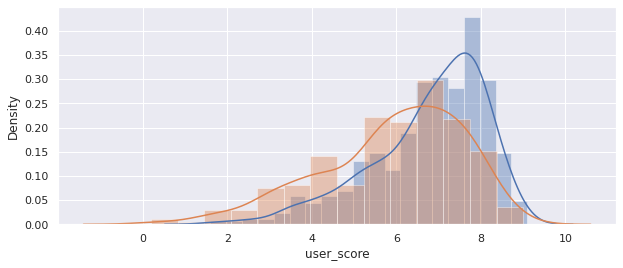

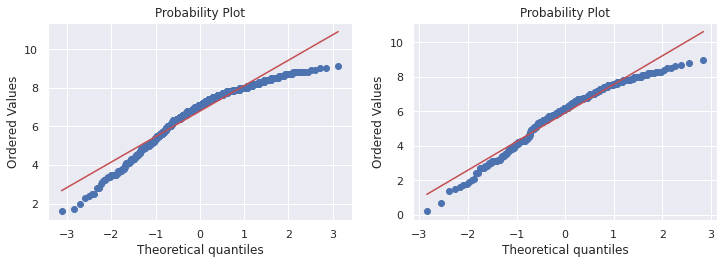

In [111]:
sns.distplot(action['user_score']);
sns.distplot(sports['user_score']);
plt.show()
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(action['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(sports['user_score'], dist="norm", plot=plt)
plt.show()

Распределение НЕ нормальное.

Проверяем t тестом

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action  и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action  и Sports отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$


Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [112]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4516152467844418e-15
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу в пользу альтернативной.

Непараметрический тест Манна-Уитни: $\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action  и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action  и Sports отличаются}
 \end{cases}
\end{equation*}$

In [113]:
results = st.mannwhitneyu(action['user_score'], sports['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  6.791700559689206e-17
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу в пользу альтернативной.

Односторонняя проверка Манна-Уитни:
    $\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action  и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги Action больше Sports}
 \end{cases}
\end{equation*}$

In [114]:
results = st.mannwhitneyu(action['user_score'], sports['user_score'], alternative='greater')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.395850279844603e-17
Отвергаем нулевую гипотезу


Односторонняя проверка Манна-Уитни 2:
    $\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action  и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги Action меньше Sports}
 \end{cases}
\end{equation*}$

In [115]:
results = st.mannwhitneyu(action['user_score'], sports['user_score'], alternative='less')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу


#### Вывод:

Исходя из статистических показателей  есть основания полагать, что средние пользовательские рейтинги жанра Action больше, чем у жанра  Sports

### Вывод:
Мы проверили две гипотезы:
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») 
разные.

Проверку сделали t тестом и тестом Манна-Уитни, у нас есть основания полагать, что:

1) Средние пользовательские рейтинги платформ Xbox One и PC НЕ отличаются.

2) Средние пользовательские рейтинги жанра Action больше, чем у жанра  Sports

## Общий вывод

Поставленная задача: Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Итоги: 

- Мы очистили данные от  пропусков, привели их в нужный формат и подготовили к анализу. Важно: Пользовательский рейтинг "To Be Determined", то есть "Будет определено" мы заменили на отрицательное число, чтобы его, при необходимости, можно было легко найти и дополнить.


- Выявили, что до 2009 кол-во выпускаемых игр стремительно возрастало, но После 2009 года крупные компании, перешли к стратегии «Fewer, Bigger, Better» т.е. стади вкладывать больше ресурсов в большие, но безопасные проекты, способные выдержать конкуренцию.


-  Определили средний срок жизни платформы (не включая PC) в 7-10 лет, после этого срока консоль устаревает и её продажи стремятся к нулю


- Определили, что для прогноза на 2016 год необходимо брать не всю историю игр, а актуальный период в 5 лет, где мы видим плавное устраевание старого поколения консолей(х360 и PS3) и взлет нового (Xone и PS4)


- Определили, что консоли нового поколения  - лидеры продаж на нынешний период


- Установили, что отстутсвует взаимосвязь между отзывами пользователей и продажей игр.


- Установили слабую взаимосвязь между отзывами критиков и продажей игр, положительная корреляция составялет 0.4


- Топ продаж всегда занимают Шутеры, второе место Платформеры, 3ее - Спортивные игры. Однако, могут быть уникальные проекты по типу Grand Theft Auto V, которые покажут невероятные продажи на всех платформах. 


- Картина в Америке и Европе похожа на общую - лучше всего продаются Шутеры и платформеры. В Японии топ 1 продаж - Ролевые игры, однако стоит учесть, что данных по Японии значительно меньше, чем по Европе и Америке. 


- Консоли нового поколения, которые приносят больше продаж:

1) PS4 и Xone в Америке

2) PS4 и PC в Европе

3) PS4 в Японии (Стоит отметить, что PS4 далеко от топ рейтинга в Японии, там в львиную долю продаж занимают "ручные консоли" по типу 3DS и PSP)


- В Америке и Европе лучшие продажи приносят игры с рейтингом "Mature 17+" от ESRB, в Японии - с рейтингом "Everyone"


- По итогу тестирования статистических гипотез можем объявить:

1) Средние пользовательские рейтинги платформ Xbox One и PC НЕ отличаются.

2) Средние пользовательские рейтинги жанра Action больше, чем у жанра  Sports


---- Рекомендации коллегам:

1) Ориентируемся на консоли нового поколения, которые сейчас переживают свой расцвет. А именно: PS4 (самый перспективный кандидат), Xone и, в меньшей степени PC(для Европы)


2) Смотрим на жанр Шутер, он мега-популярен и делает основную выручку.


3) Часть финансирования можно выделить на работу с отзывами Критиков, они, хоть и в маленькой степени, но влияют на продажи.


4) Придерживаемся рейтинга "Mature 17+" от ESRB
